In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
#from sklearn import linear_model
sns.set_style('white')
import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
#from sklearn import preprocessing
#from statsmodels.graphics.gofplots import ProbPlot


/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
smarket = pd.read_csv('../data/Smarket.csv', index_col = 0, dtype = {'Direction': 'category'})
print('Head of Smarket: \n ')
print(smarket.head())
print('\n \n \n \n Description of Smarket: \n ')
print(smarket.describe())

Head of Smarket: 
 
   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

 
 
 
 Description of Smarket: 
 
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000 

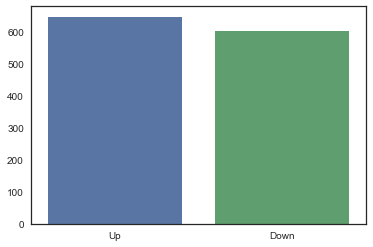

In [3]:
sns.barplot(x = ['Up', 'Down'], y = [smarket.Direction.value_counts()['Up'], smarket.Direction.value_counts()['Down']])

In [4]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


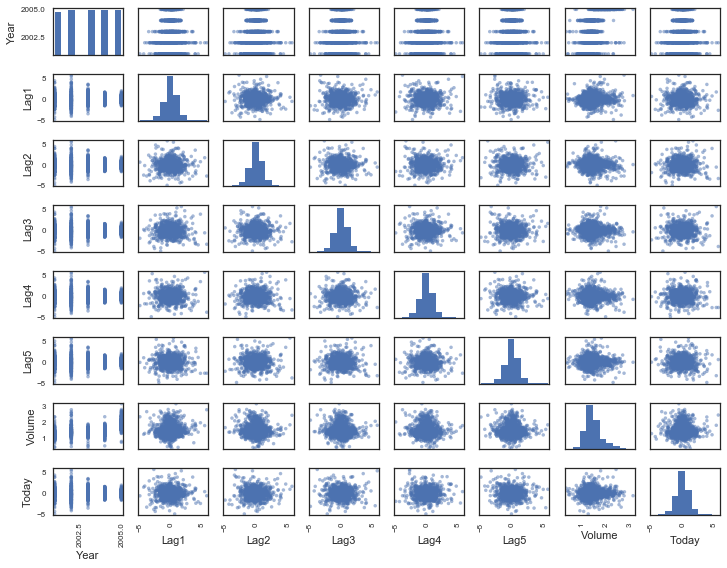

In [5]:
pd.plotting.scatter_matrix(smarket)
plt.tight_layout(rect = (0,0,1.7,2))
plt.show()

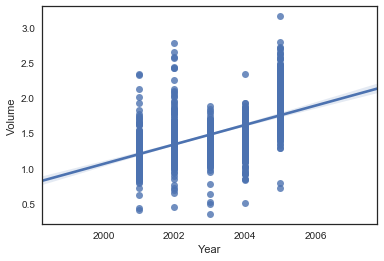

In [6]:
sns.regplot(smarket.Year, smarket.Volume)

In [7]:
pd.crosstab(smarket['Direction'], smarket['Year'])

Year,2001,2002,2003,2004,2005
Direction,,,,,
Down,125,140,114,112,111
Up,117,112,138,140,141


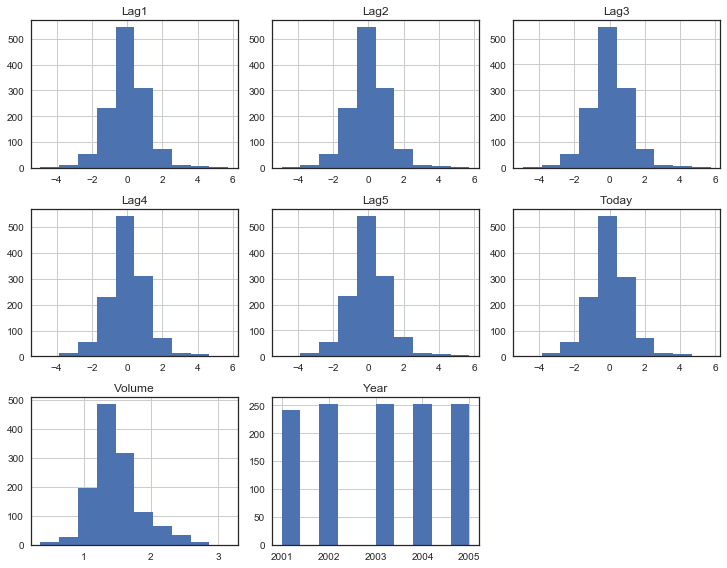

In [8]:
smarket.hist()
plt.tight_layout(rect = (0,0,1.7,2))
plt.show()

In [9]:
dummy_directions = pd.get_dummies(smarket['Direction'], prefix = 'Direction')
dummy_directions.head()

,Direction_Down,Direction_Up
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1


In [10]:
smarket = smarket.join(dummy_directions)
smarket = sm.add_constant(smarket)
smarket.head()

,const,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Down,Direction_Up
1,1.0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0,1
2,1.0,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0,1
3,1.0,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1,0
4,1.0,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0,1
5,1.0,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0,1


In [11]:
direc_pred = sm.Logit(smarket.Direction_Up, smarket[['const','Lag1', 'Lag2', 'Lag3' ,'Lag4', 'Lag5', 'Volume']]).fit()
print(direc_pred.summary(), '\n \n')
print('Coefficients:\n', direc_pred.params)

Optimization terminated successfully.
         Current function value: 2.197001
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2017   Pseudo R-squ.:                  -5.451
Time:                        12:56:54   Log-Likelihood:                -2746.3
converged:                       True   LL-Null:                       -425.74
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

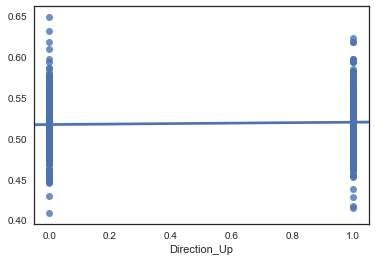

In [12]:
sns.regplot(smarket.Direction_Up, direc_pred.predict())

In [13]:
#this is the worst model ever, but then, none of the p's were significant
pred_factors = len(direc_pred.predict()) * ['Down']
for i in np.arange(len(direc_pred.predict())):
    if direc_pred.predict()[i] > 0.5:
        pred_factors[i] = 'Up'

In [14]:
#confusion matrix
direc_pred.pred_table()

array([[ 145.,  457.],
       [ 141.,  507.]])

In [15]:
print((507+141)/1250)
print(np.mean(direc_pred.predict()))

0.5184
0.5184


In [16]:
smark_train = smarket[smarket.Year < 2005]
smark_test = smarket[smarket.Year == 2005]

In [17]:
split_smark_fit = sm.Logit(smark_train.Direction_Up, smark_train[['const','Lag1', 'Lag2', 'Lag3' ,'Lag4', 'Lag5', 'Volume']]).fit()
print(split_smark_fit.summary(), '\n \n')
print('Coefficients:\n', split_smark_fit.params)

Optimization terminated successfully.
         Current function value: 3.346650
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2017   Pseudo R-squ.:                  -8.723
Time:                        12:56:55   Log-Likelihood:                -3340.0
converged:                       True   LL-Null:                       -343.50
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.

In [18]:
t_prediction = split_smark_fit.predict(smark_test[['const','Lag1', 'Lag2', 'Lag3' ,'Lag4', 'Lag5', 'Volume']])
split_pred = pd.DataFrame(t_prediction, columns = ['probability_up'])
split_pred['predicted'] = 'Down'
split_pred.loc[split_pred.probability_up > 0.5, 'predicted'] = 'Up'

In [19]:
smark_test = smark_test.join(split_pred)
smark_test.groupby(['Direction', 'predicted']).size()

Direction  predicted
Down       Down         77
           Up           34
Up         Down         97
           Up           44
dtype: int64